# Statistical Analysis of EL Images

In this Jupyter notebook, I am trying to study statistical traits using histogram plotting. I have added comments to give some insight on the results I obtained.
In this work, I will be using cropped images (preprocessing by me, cropping by Teh). These images are not uniform(no of pixels differ in each panel image) and hence can't be used in Autoencoder, but can be used in histogram plotting.


In [2]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.datasets import mnist
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d
from scipy import ndimage, misc
import matplotlib.pyplot as plt
import matplotlib.image as matimg
import skimage
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_nl_means, estimate_sigma, denoise_wavelet
from skimage import data, img_as_float
from skimage import measure
from skimage import util 
import skimage.feature
import skimage.viewer
import skimage.io
from copy import deepcopy
import random
from numpy import asarray
from skimage.metrics import structural_similarity as ssim
from matplotlib.pyplot import savefig
import os,sys

#Load and show an image with Pillow
from PIL import Image

from scipy import ndimage as ndi
from skimage import feature

In [4]:
# using cropped images

# Open a file
root = "cropped/"
#dirs = os.listdir(root)
monthly_data = []

for filename in os.listdir(root):
    print(filename)
    monthly_data.append(cv2.imread('cropped/{0}'.format(filename),0))
    

01_grayc.jpg
02_grayc.jpg
03_grayc.jpg
04_grayc.jpg
05_grayc.jpg
06_grayc.jpg
07_grayc.jpg
08_grayc.jpg
09_grayc.jpg
10_grayc.jpg
11_grayc.jpg
12_grayc.jpg


In [5]:
# Function to plot panel images ang histogram. It can even be used to save images in folder using either saveimage = True
# or saveimage = False 

def plot_func(images, saveimage, x=4,y=3, plot_type='image', cmap='gray', savename=''):
    if plot_type == 'image':
        plt.figure(figsize=(15,15))
        for i in range(len(images)):
            ax = plt.subplot(x,y,i+1)
            plt.imshow(images[i], cmap = 'gray')
        
    elif plot_type == 'histogram':
        plt.figure(figsize=(15,15))
        for i in range(len(monthly_hist)):
            ax = plt.subplot(x,y,i+1)
            plt.plot(monthly_hist[i])
    else:
        print('Wrong plot type selected, please select either "image" or "histogram"')
        return 0
    if(saveimage==True):
        plt.savefig(savename, bbox_inches='tight', format = 'png')

In [6]:
# Sample cv2 plot

#plt.imshow(monthly_data[1])
cv2.imshow('Cropped Image',monthly_data[1])
cv2.waitKey(0)
cv2.destroyAllWindows()

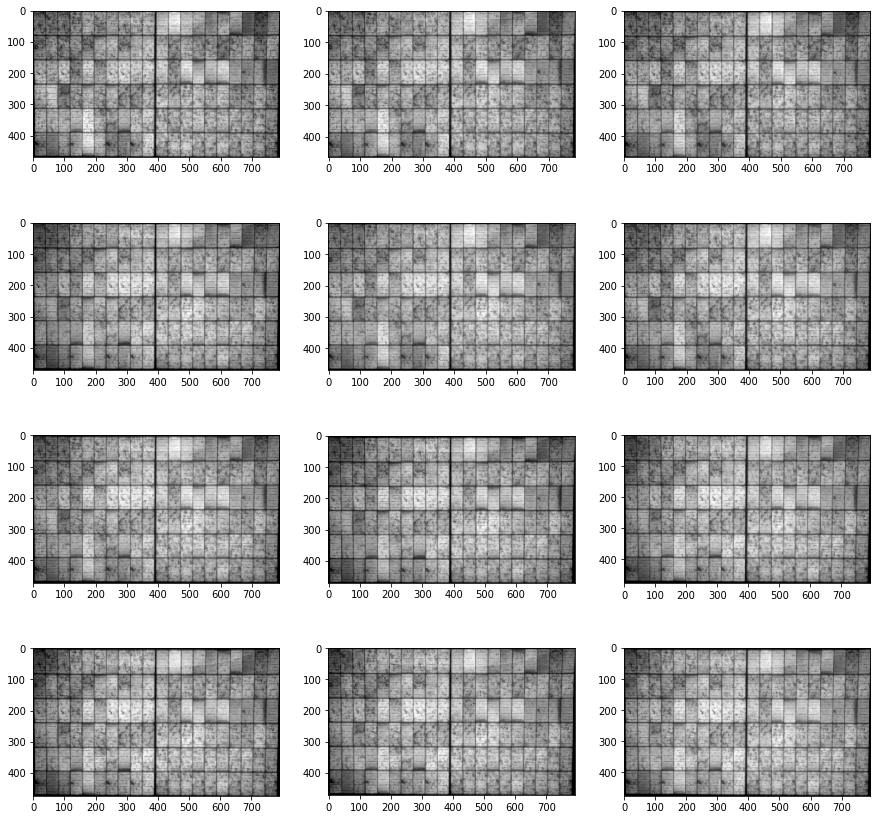

In [7]:
# Displays cropped monthly REC data

plot_func(monthly_data, plot_type='image', saveimage = False, x=4, y=3)


In [9]:
# To check the shape of each image, from here one can see that all images have different shape

print('October_01', monthly_data[0].shape)
print('November_02', monthly_data[1].shape)
print('December_03', monthly_data[2].shape)
print('January_04', monthly_data[3].shape)
print('February_05', monthly_data[4].shape)
print('March_06', monthly_data[5].shape)
print('April_07', monthly_data[6].shape)
print('May_08', monthly_data[7].shape)
print('June_09', monthly_data[8].shape)
print('July_10', monthly_data[9].shape)
print('August_11', monthly_data[10].shape)
print('September_12', monthly_data[11].shape)

October_01 (468, 788)
November_02 (465, 783)
December_03 (465, 785)
January_04 (472, 788)
February_05 (470, 784)
March_06 (470, 787)
April_07 (473, 788)
May_08 (470, 788)
June_09 (477, 793)
July_10 (473, 790)
August_11 (474, 792)
September_12 (476, 792)


<Figure size 1080x1080 with 0 Axes>

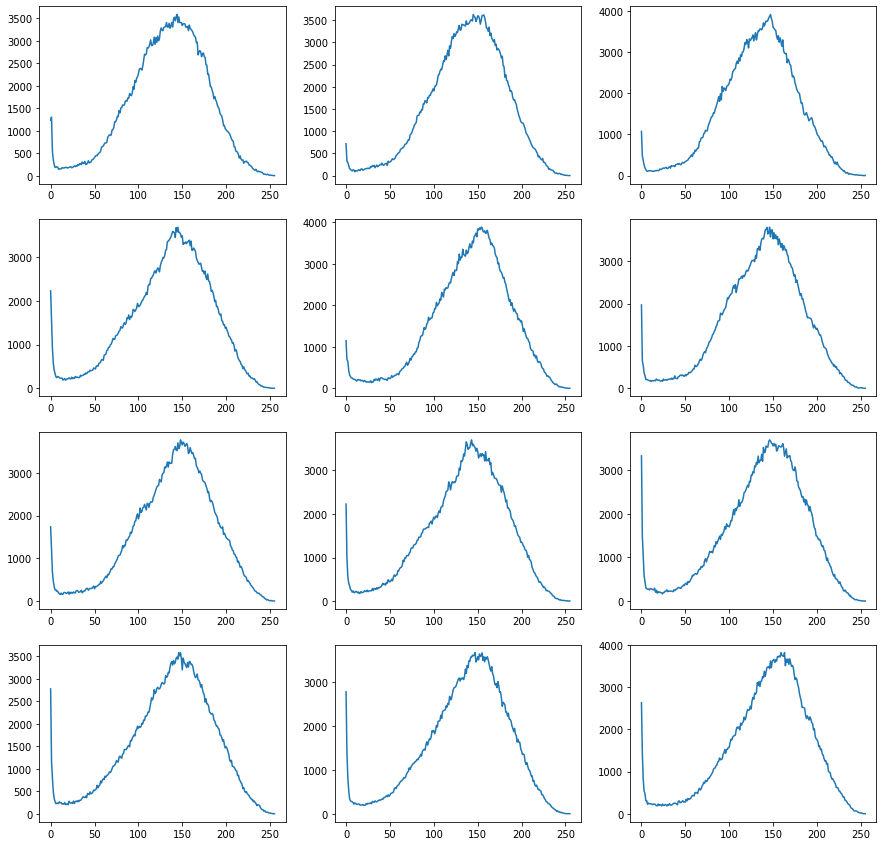

In [11]:
# Plotting monthly histograms

# Months are arranged from October to September [fresh panel to degraded panel]

plt.figure(figsize=(15, 15))
monthly_hist = []

i = 0
for i in range(len(monthly_data)):
    h, b = np.histogram(monthly_data[i], bins=256, range=(0, 255))
    monthly_hist.append(h)
    
plot_func(monthly_hist, plot_type='histogram', saveimage = False, x=4, y=3)

Observation 1: Number of black pixels from first month to last month have increased.

# Histogram Plotting

Now, in order to plot histogram, each month's data has been flattened in 1D array, it's mean is calculated and histogram is plotted. Further, 3 arrays namely, black_m?, gray_m?, and white_m? where I have binned pixel values less than 80 in black, 80-180 as gray and greater than 180 as white.

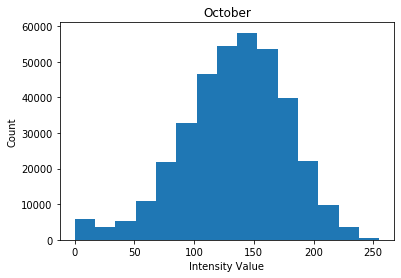

Mean value 133.33741431298537
Black 40970
Gray 280220
White 47594


In [15]:
# October

_ = plt.hist(monthly_data[0].flatten(), bins = 15, range = (0,255))
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count') 
_ = plt.title('October')
plt.show()

print('Mean value', np.mean(monthly_data[0]))

m0_flat = monthly_data[0].flatten()

black_m0 = 0
gray_m0 = 0
white_m0 = 0
i=0
for i in range(len(m0_flat)):
    if (m0_flat[i]<=80):
        black_m0+=1
    elif(m0_flat[i]>80) and (m0_flat[i]<=180):
        gray_m0+=1
    else:
        white_m0+=1
print('Black', black_m0)
print('Gray', gray_m0)
print('White', white_m0)



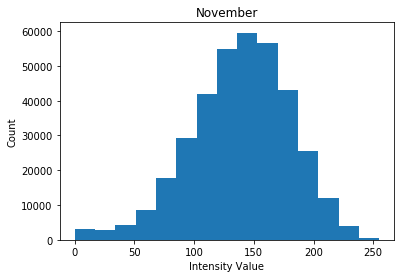

Mean value 138.2694379214216
Black 31182
Gray 278061
White 54852


In [251]:
# November

_ = plt.hist(monthly_data[1].flatten(), bins = 15, range = (0,255))
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.title('November')
plt.show()



print('Mean value', np.mean(monthly_data[1]))

m1_flat = monthly_data[1].flatten()

black_m1 = 0
gray_m1 = 0
white_m1 = 0
i=0
for i in range(len(m1_flat)):
    if (m1_flat[i]<=80):
        black_m1+=1
    elif(m1_flat[i]>80) and (m1_flat[i]<=180):
        gray_m1+=1
    else:
        white_m1+=1
print('Black', black_m1)
print('Gray', gray_m1)
print('White', white_m1)


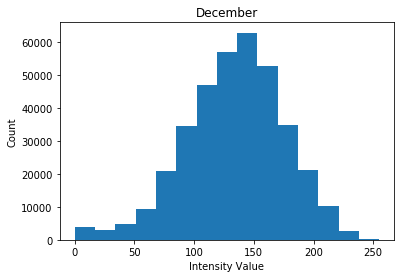

Mean value 133.7078665844805
Black 35346
Gray 285257
White 44422


In [252]:
# December

_ = plt.hist(monthly_data[2].flatten(), bins = 15, range = (0,255))
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count') 
_ = plt.title('December')
plt.show()

print('Mean value', np.mean(monthly_data[2]))

m2_flat = monthly_data[2].flatten()

black_m2 = 0
gray_m2 = 0
white_m2 = 0
i=0
for i in range(len(m2_flat)):
    if (m2_flat[i]<=80):
        black_m2+=1
    elif(m2_flat[i]>80) and (m2_flat[i]<=180):
        gray_m2+=1
    else:
        white_m2+=1
print('Black', black_m2)
print('Gray', gray_m2)
print('White', white_m2)


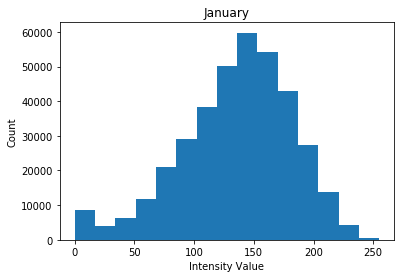

Mean value 135.17461068570938
Black 45956
Gray 266672
White 59308


In [253]:
#January

_ = plt.hist(monthly_data[3].flatten(), bins = 15, range = (0,255))
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count') 
_ = plt.title('January')
plt.show()

print('Mean value', np.mean(monthly_data[3]))

m3_flat = monthly_data[3].flatten()

black_m3 = 0
gray_m3 = 0
white_m3 = 0
i=0
for i in range(len(m3_flat)):
    if (m3_flat[i]<=80):
        black_m3+=1
    elif(m3_flat[i]>80) and (m3_flat[i]<=180):
        gray_m3+=1
    else:
        white_m3+=1
print('Black', black_m3)
print('Gray', gray_m3)
print('White', white_m3)

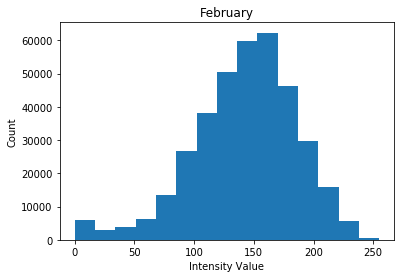

Mean value 142.00783488927485
Black 28359
Gray 273745
White 66376


In [254]:
# February

_ = plt.hist(monthly_data[4].flatten(), bins = 15, range = (0,255))
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.title('February')
plt.show()

print('Mean value', np.mean(monthly_data[4]))

m4_flat = monthly_data[4].flatten()

black_m4 = 0
gray_m4 = 0
white_m4 = 0
i=0
for i in range(len(m4_flat)):
    if (m4_flat[i]<=80):
        black_m4+=1
    elif(m4_flat[i]>80) and (m4_flat[i]<=180):
        gray_m4+=1
    else:
        white_m4+=1
print('Black', black_m4)
print('Gray', gray_m4)
print('White', white_m4)

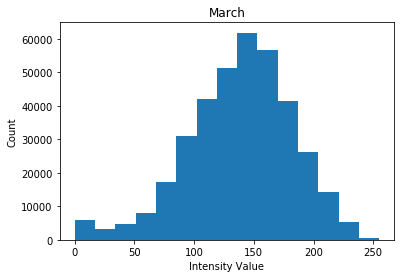

Mean value 137.8015869582849
Black 34013
Gray 277148
White 58729


In [255]:
# March

_ = plt.hist(monthly_data[5].flatten(), bins = 15, range = (0,255))
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.title('March')
plt.show()

print('Mean value', np.mean(monthly_data[5]))

m5_flat = monthly_data[5].flatten()

black_m5 = 0
gray_m5 = 0
white_m5 = 0
i=0
for i in range(len(m5_flat)):
    if (m5_flat[i]<=80):
        black_m5+=1
    elif(m5_flat[i]>80) and (m5_flat[i]<=180):
        gray_m5+=1
    else:
        white_m5+=1
print('Black', black_m5)
print('Gray', gray_m5)
print('White', white_m5)

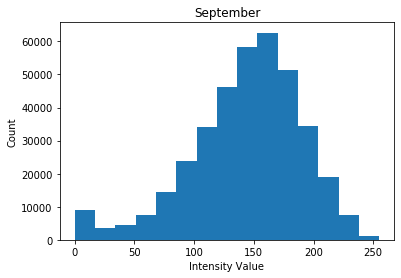

Mean value 143.2440343561667
Black 34579
Gray 264756
White 77657


In [256]:
# Final month

# September

_ = plt.hist(monthly_data[11].flatten(), bins = 15, range = (0,255))
_ = plt.xlabel('Intensity Value')
_ = plt.ylabel('Count')
_ = plt.title('September')
plt.show()

print('Mean value', np.mean(monthly_data[11]))

m11_flat = monthly_data[11].flatten()

black_m11 = 0
gray_m11 = 0
white_m11 = 0
i=0
for i in range(len(m11_flat)):
    if (m11_flat[i]<=80):
        black_m11+=1
    elif(m11_flat[i]>80) and (m11_flat[i]<=180):
        gray_m11+=1
    else:
        white_m11+=1
print('Black', black_m11)
print('Gray', gray_m11)
print('White', white_m11)

Observation 2: From the histogram plotted, we noticed that mean is drifting back and forth between 0 and 255, Although, as per out hope it should continuously drop. We also observed that number of pixels in black category is increasing at first and then decrease and then starts increasing. Although, from month 1 to month 12, they have significantly increased. 
* Note here: No of pixels in every image is different, and cropping is not perfect and hence we encounter black pixels from background more in some images that another, and hence it contributes in the no of black pixels. I have shared a powerepoint presentation, "EL_Analysis_Approach and Idea proposal", where I have proposed some cropping mechanism to make these results more robust.

Observation 3: Although I have binned the pixels in 15 bins, visually we can see that even though the mean is fluctuating (decreasing in some months), first bin corresponding to darkest pixels are actually increasing.